In [2]:
import pandas   as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filename="http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
 
df=pd.read_csv(filename,sep=",", header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'cash'])
if (df['age'][0] == '|1x3 Cross validator') :
    df.drop(0, inplace=True)

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


array([<AxesSubplot:ylabel='A'>, <AxesSubplot:ylabel='B'>,
       <AxesSubplot:ylabel='M'>, <AxesSubplot:ylabel='N'>,
       <AxesSubplot:ylabel='P'>], dtype=object)

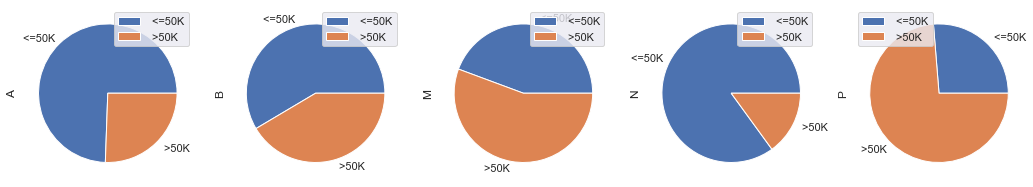

In [41]:
from statsmodels.graphics.mosaicplot import mosaic
e=df['education'].unique()
print(e)
ed_levels=['Y','N','N','Y','N','N','N','N','N','Y','Y','N','N','N','N','N']
e2=['B','N','N','M','N','N','A','A','N','P','P','N','N','N','N','N']
df['college_degree'] = df['education'].replace(e,ed_levels)
df['ed3'] = df['education'].replace(e,e2)
#fig, ax = plt.subplots(figsize=(18, 12))
#ax=mosaic(df, [ 'college_degree','cash'],  gap=0.06, title='DataFrame',ax=ax)

#plt.show() 
cros=pd.crosstab(df['cash'],df['ed3'])
cros.plot.pie(subplots=True,figsize=(18, 12))

Above, Education grouped into A (some college,assoc), B(College), M(Masters), N(HS or less), P (professional or doctorate)
Maybe keep all 5 of these levels.
Below, grouped only into College degree( Y or N)


array([<AxesSubplot:ylabel='N'>, <AxesSubplot:ylabel='Y'>], dtype=object)

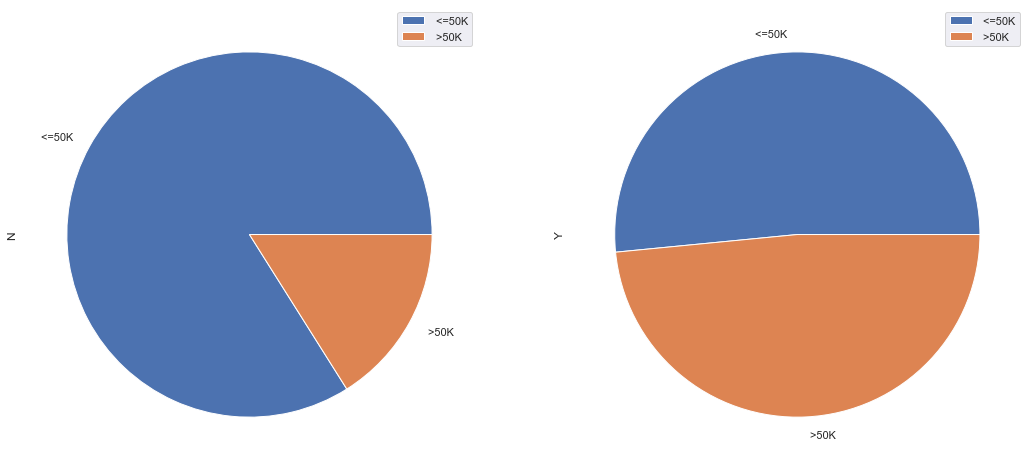

In [42]:
e=df['education'].unique()
ed_levels=['Y','N','N','Y','N','N','N','N','N','Y','Y','N','N','N','N','N']
df['college_degree'] = df['education'].replace(e,ed_levels)
cros=pd.crosstab(df['cash'],df['college_degree'])
cros.plot.pie(subplots=True,figsize=(18, 12))

In [35]:
df['marital-status'].value_counts()


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

Below, rates for all levels of marital status.  The two groups (Married-AF and Married-civ  are similar, while the other five are similar. Makes sense to dichotomize .

[Text(0, 0.5, 'Percent'), Text(0.5, 0, 'Marital Status')]

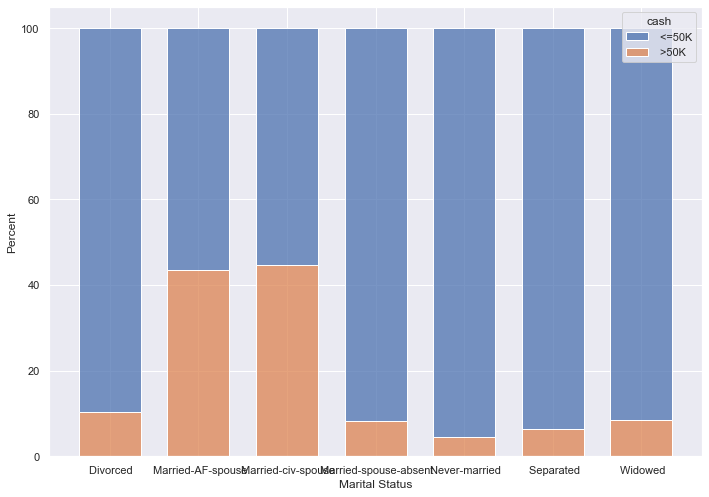

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = df.groupby(['marital-status'])['cash'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(x = 'marital-status' , hue = 'cash',weights= 'percent',multiple = 'stack',data=plot,shrink = 0.7)
g.set(ylabel="Percent",xlabel="Marital Status")

In [12]:
m=df['marital-status'].unique()
m_levels=['N','Y','N','N','N','Y','N']
print(e)
print(m_levels)

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
['N', 'Y', 'N', 'N', 'N', 'Y', 'N']


[Text(0, 0.5, 'Percent'), Text(0.5, 0, 'Maried')]

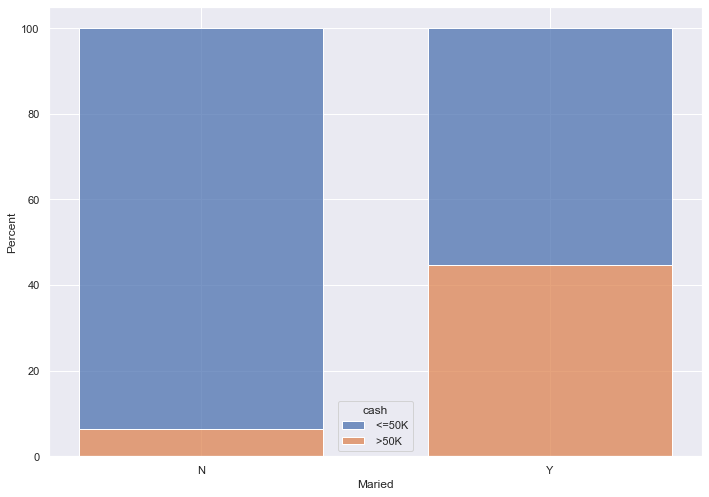

In [20]:
df['married'] = df['marital-status'].replace(m,m_levels)
plot = df.groupby(['married'])['cash'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(x = 'married' , hue = 'cash',weights= 'percent',multiple = 'stack',data=plot,shrink = 0.7)
g.set(ylabel="Percent",xlabel="Married")

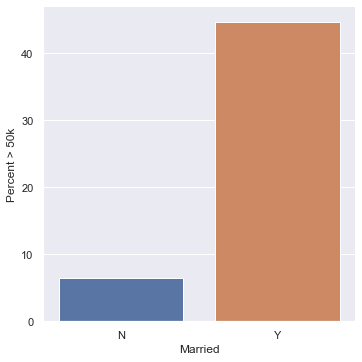

In [23]:
df_test = pd.factorize(df['cash'])[0]
df2= df.copy()
df2['cash'] = df_test*100
g = sns.catplot(data=df2, x='married',  y='cash', kind='bar', ci=None)
g.set(ylabel="Percent > 50k",xlabel="Married")

array([<AxesSubplot:ylabel='N'>, <AxesSubplot:ylabel='Y'>], dtype=object)

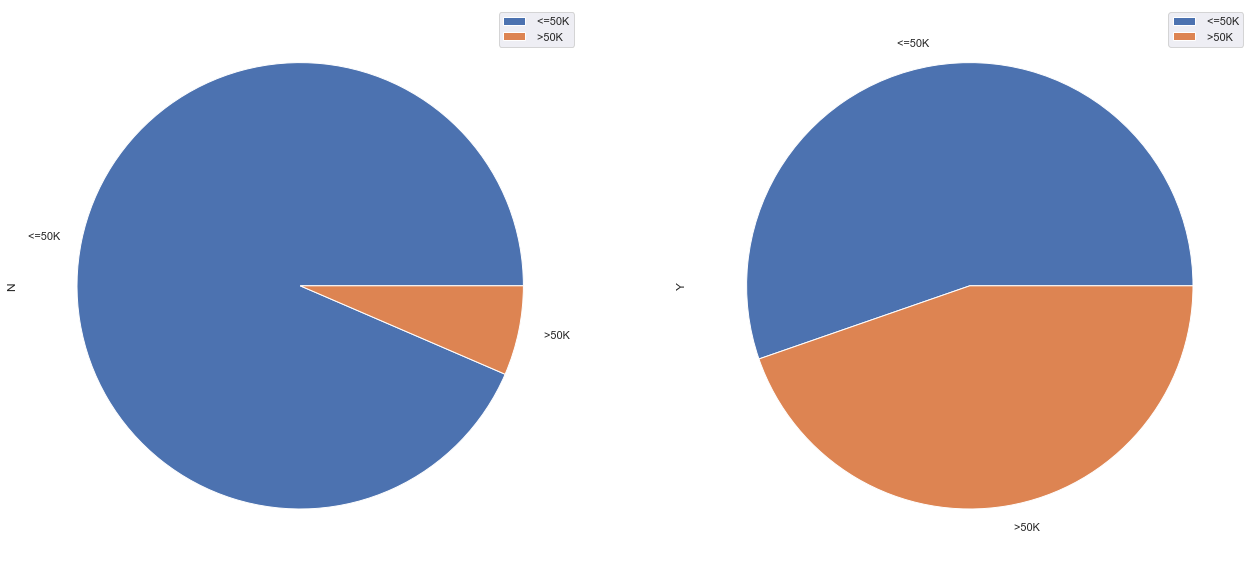

In [25]:
cros=pd.crosstab(df['cash'],df['married'])
cros.plot.pie(subplots=True, figsize=(22,12))